<a href="https://colab.research.google.com/github/zhesun0304/ECON3916/blob/main/Lab7/Estimation_%E2%80%94_From_Formulas_to_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

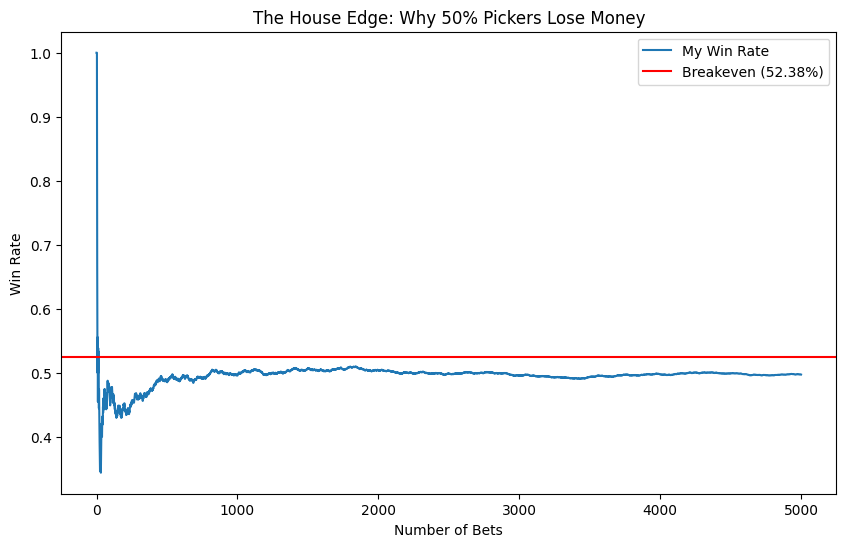

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Estimation — From Formulas to Bootstrapping
# The Law of Large Numbers (FanDuel/DraftKings)

# Setup
true_skill = 0.50 # wining chance of 50%
breakeven = 0.5238 # -110 odds requires 52.38% to profit
n_bets = 5000 # Simulating full play

# Simulate
outcomes = np.random.binomial(1, true_skill, n_bets)
cumulative_win_rate = np.cumsum(outcomes) / np.arange(1, n_bets + 1)

# Plotting graph
plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

Sampling Error Audit:
Sample 1: Mean = 38.00% | Error = +2.73%
Sample 2: Mean = 36.00% | Error = +0.73%
Sample 3: Mean = 24.00% | Error = -11.27%


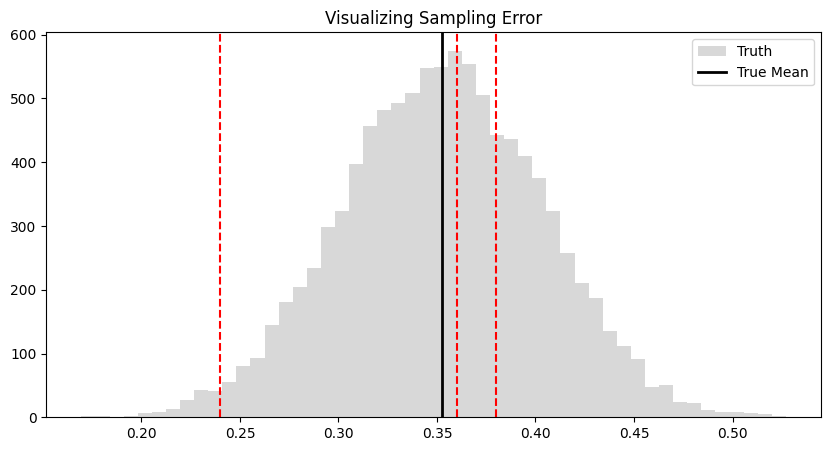

In [10]:
# Visualizing Sampling Error
# Matching true population mean

# True population mean
true_mu = 0.3527

# Simulate 3 distinct "Samples"
samples = []
print(f"Sampling Error Audit:")

for i in range(3):
    # Draw 50 random bets
    sample = np.random.binomial(1, true_mu, 50)

    # Calculate stats
    x_bar = sample.mean()
    error = x_bar - true_mu   # The Formula: Error = x_bar - mu

    print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
    samples.append(x_bar)

# Visual Check
plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--') # Our Samples
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()

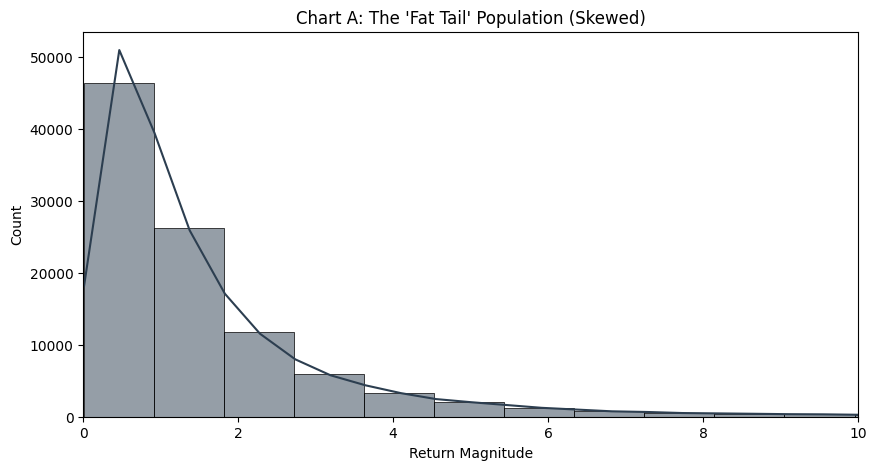

In [11]:
import seaborn as sns

# The Central Limit Theorem (Crypto Returns)
# Visualizing population

# Define the "Crypto Universe" (Population)
# Using log-normal to match the skewed long tail and humpshape of markets
population_data = np.random.lognormal(mean=0, sigma=1.0, size=100000)

# Visualize the Chaos
plt.figure(figsize=(10, 5))
sns.histplot(population_data, bins=100, kde=True, color='#2c3e50')
plt.xlim(0, 10)  # Crop to see the shape clearly
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()

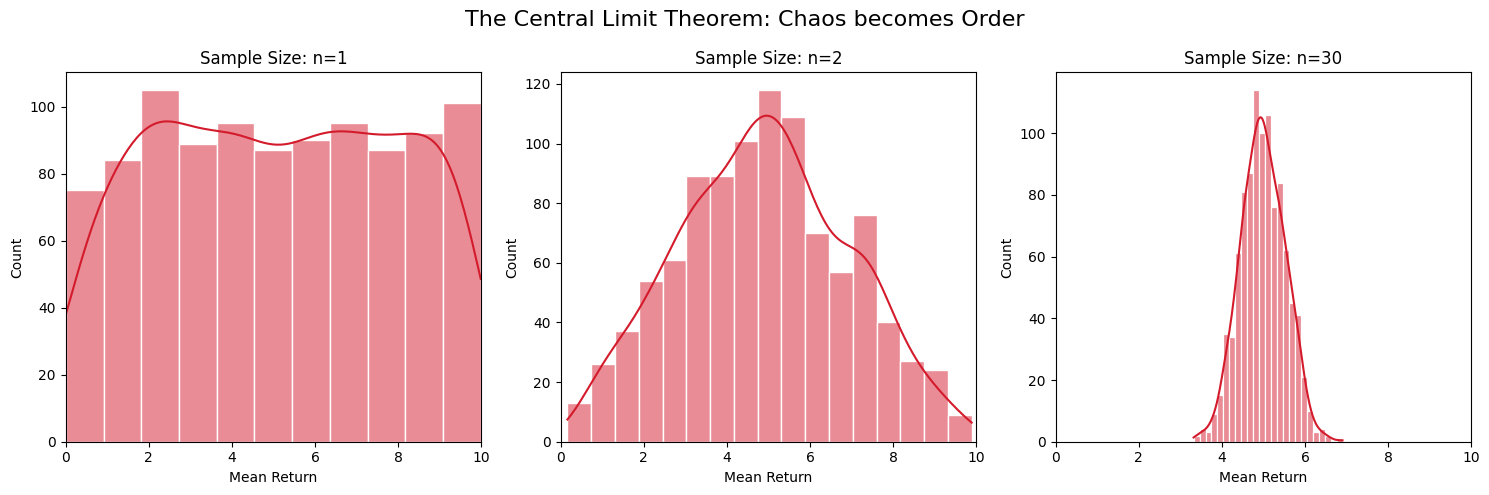

In [12]:
# The CLT Simulation ($n=1, 2, 30$)
# Setup: Compare 3 sample sizes to match the slide
sample_sizes = [1, 2, 30]
simulations = 1000

plt.figure(figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    # 1. The Loop: Calculate 1000 averages
    means = []
    for _ in range(simulations):
        sample = np.random.uniform(0, 10, size=n)
        means.append(np.mean(sample))

    # 2. Plotting
    plt.subplot(1, 3, i+1)
    sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Mean Return")
    plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
# The Series C SaaS Metric (LTV/CAC)
# The Soup Analogy (Does Population Size Matter?)
# Two Populations, same variance, vastly different sizes
std_dev = 15000  # Variation in spending
n = 100      # Only sampling 100 users

# Calculate Margin of Error (1.96 * sigma / sqrt(n))
# Notice: Big 'N' (Population Size) is NOT in this formula!
margin_error = np.round(1.96 * std_dev / np.sqrt(n), 2)

print(f"--- The Soup Analogy ---")
print(f"Population: 1,000 users   | Margin of Error: ±${margin_error:,.2f}")
print(f"Population: 1,000,000 users | Margin of Error: ±${margin_error:,.2f}")
print(f"Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.")

--- The Soup Analogy ---
Population: 1,000 users   | Margin of Error: ±$2,940.00
Population: 1,000,000 users | Margin of Error: ±$2,940.00
Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.


In [14]:
# Robust v.s. Volatile
# Metric: LTV/CAC Ratio (Target > 3.0)
mean_val = 4.0
n_samples = 50

# Compare Stable (A) vs Volatile (B) Companies
sigma_A = 0.5  # Stable
sigma_B = 6.0  # Volatile

moe_A = np.round(1.96 * sigma_A / np.sqrt(n_samples), 2)
moe_B = np.round(1.96 * sigma_B / np.sqrt(n_samples), 2)

print("\n--- VC Audit: Series C Benchmark (> 3.0) ---")

print(f"Startup A (Stable):")
print(f"   95% CI: [{mean_val - moe_A:.1f}, {mean_val + moe_A:.1f}]")
print(f"   Decision: INVEST. (Lower bound > 3.0)")

print(f"\nStartup B (Volatile):")
print(f"   95% CI: [{mean_val - moe_B:.1f}, {mean_val + moe_B:.1f}]")
print(f"   Decision: PASS. (Lower bound implies potential loss)")


--- VC Audit: Series C Benchmark (> 3.0) ---
Startup A (Stable):
   95% CI: [3.9, 4.1]
   Decision: INVEST. (Lower bound > 3.0)

Startup B (Volatile):
   95% CI: [2.3, 5.7]
   Decision: PASS. (Lower bound implies potential loss)


In [15]:
# GenAI Expansion — The "P.R.I.M.E." Protocol
# Naive Simulation(Manual codes)
# BASE CASE: Independence Assumption
n_simulations = 1000
months = 24
start_cash = 650_000 # Start cash reduced from 2_000_000 for probability of ruin purpose
bankruptcies = 0

print("Running Base Model (Independence)...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # SIMULATION LOGIC:
        # Revenue: Average $80k, swings wildly (StdDev $30k)
        # Burn: Average $100k, fairly fixed (StdDev $10k)
        # INDEPENDENT: Bad revenue months don't automatically trigger cost cuts.

        revenue = np.random.normal(80000, 30000)
        burn = np.random.normal(100000, 10000)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Base Model Risk of Ruin: {prob_ruin:.1%}")
print("Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.")

Running Base Model (Independence)...
Base Model Risk of Ruin: 15.1%
Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.


In [8]:
# Refractored Model
# CORRELATED MODEL: Real-World Assumption

n_simulations = 1000
months = 24
start_cash = 680_000
bankruptcies = 0

# Parameters
mean_revenue = 80_000
std_revenue = 30_000

mean_burn = 100_000
std_burn = 10_000

rho = 0.7  # Correlation between Revenue and Burn

# Mean vector
means = [mean_revenue, mean_burn]

# Covariance matrix
cov_matrix = [
    [std_revenue**2, rho * std_revenue * std_burn],
    [rho * std_revenue * std_burn, std_burn**2]
]

print("Running Correlated Model (Real World)...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        revenue, burn = np.random.multivariate_normal(means, cov_matrix)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin_corr = bankruptcies / n_simulations
print(f"Correlated Model Risk of Ruin: {prob_ruin_corr:.1%}")


Running Correlated Model (Real World)...
Correlated Model Risk of Ruin: 5.0%


## Followups
We adjusted the initial cash balance to place the startup near the bankruptcy threshold. Under the original parameters, bankruptcy was a far-tail event, and both the independent and correlated models showed zero observed ruin. Calibrating the model closer to the runway boundary allows us to meaningfully compare how correlation between revenue and burn affects downside risk. Under this calibrated setting, introducing correlation reduces the probability of ruin by acting as a natural hedge.